In [2]:
import pandas as pd

# Cargar el archivo CSV tratado
ruta_csv = r"C:\Users\Ceci\Downloads\TELECOM PARTE 2\datos_tratados.csv"
df = pd.read_csv(ruta_csv)

# Mostrar información básica
display(df.head())
print(f"Shape: {df.shape}")
print(f"Columnas: {list(df.columns)}")

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.4


Shape: (7043, 22)
Columnas: ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges', 'Charges_Monthly', 'Charges_Total']


In [3]:
# Eliminar columnas irrelevantes (por ejemplo, identificadores únicos)
columnas_a_eliminar = ['customerID'] if 'customerID' in df.columns else []
df = df.drop(columns=columnas_a_eliminar)

# Mostrar las columnas restantes y la forma del DataFrame
display(df.head())
print(f"Shape después de eliminar columnas: {df.shape}")
print(f"Columnas actuales: {list(df.columns)}")

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges,Charges_Monthly,Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}",65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}",59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}",73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}",98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}",83.9,267.4


Shape después de eliminar columnas: (7043, 21)
Columnas actuales: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges', 'Charges_Monthly', 'Charges_Total']


In [4]:
# Codificación one-hot de variables categóricas
columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir la variable objetivo si es categórica (por ejemplo, 'Churn')
if 'Churn' in columnas_categoricas:
    columnas_categoricas.remove('Churn')

# Aplicar one-hot encoding
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# Mostrar el resultado
display(df_encoded.head())
print(f"Shape después de encoding: {df_encoded.shape}")
print(f"Columnas actuales: {list(df_encoded.columns)}")

,Churn,SeniorCitizen,tenure,Charges_Monthly,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Charges_Total_995.35,Charges_Total_996.45,Charges_Total_996.85,Charges_Total_996.95,Charges_Total_997.65,Charges_Total_997.75,Charges_Total_998.1,Charges_Total_999.45,Charges_Total_999.8,Charges_Total_999.9
0,No,0,9,65.6,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,No,0,9,59.9,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,Yes,0,4,73.9,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Yes,1,13,98.0,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Yes,1,3,83.9,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


Shape después de encoding: (7043, 13166)
Columnas actuales: ['Churn', 'SeniorCitizen', 'tenure', 'Charges_Monthly', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', "Charges_{'Monthly': 100.0, 'Total': '1888.65'}", "Charges_{'Monthly': 100.0, 'Total': '3320.6'}", "Charges_{'Monthly': 100.0, 'Total': '3835.55'}", "Charges_{'Monthly': 100.0, 'Total': '

In [2]:
# Imputación de valores faltantes y normalización/estandarización
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Asegurar que df esté definido
try:
    df
except NameError:
    ruta_csv = r"C:\Users\Ceci\Downloads\TELECOM PARTE 2\datos_tratados.csv"
    df = pd.read_csv(ruta_csv)

# Asegurar que df_encoded esté definido
try:
    df_encoded
except NameError:
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if 'Churn' in columnas_categoricas:
        columnas_categoricas.remove('Churn')
    df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
    if df_encoded['Churn'].dtype == object:
        df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Imputar valores faltantes (media para numéricos, moda para categóricos)
num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_encoded.select_dtypes(include=['uint8', 'bool']).columns

# Convertir todas las columnas cat_cols a int para evitar error con SimpleImputer
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype(int)

imputer_num = SimpleImputer(strategy='mean')
df_encoded[num_cols] = imputer_num.fit_transform(df_encoded[num_cols])

# (En este caso, las variables categóricas ya están codificadas como 0/1, por lo que no suele haber NaN, pero si los hubiera:)
if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df_encoded[cat_cols] = imputer_cat.fit_transform(df_encoded[cat_cols])

# Normalización/Estandarización (StandardScaler)
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Mostrar resultado
display(df_encoded.head())
print(f"Shape después de imputar y escalar: {df_encoded.shape}")
print(f"Columnas actuales: {list(df_encoded.columns)}")

,Churn,SeniorCitizen,tenure,Charges_Monthly,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,Charges_Total_995.35,Charges_Total_996.45,Charges_Total_996.85,Charges_Total_996.95,Charges_Total_997.65,Charges_Total_997.75,Charges_Total_998.1,Charges_Total_999.45,Charges_Total_999.8,Charges_Total_999.9
0,-0.601023,-0.439916,-0.951682,0.025857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.601023,-0.439916,-0.951682,-0.166396,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.663829,-0.439916,-1.155283,0.305803,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.663829,2.273159,-0.788800,1.118659,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.663829,2.273159,-1.196004,0.643088,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape después de imputar y escalar: (7043, 20208)
Columnas actuales: ['Churn', 'SeniorCitizen', 'tenure', 'Charges_Monthly', 'customerID_0003-MKNFE', 'customerID_0004-TLHLJ', 'customerID_0011-IGKFF', 'customerID_0013-EXCHZ', 'customerID_0013-MHZWF', 'customerID_0013-SMEOE', 'customerID_0014-BMAQU', 'customerID_0015-UOCOJ', 'customerID_0016-QLJIS', 'customerID_0017-DINOC', 'customerID_0017-IUDMW', 'customerID_0018-NYROU', 'customerID_0019-EFAEP', 'customerID_0019-GFNTW', 'customerID_0020-INWCK', 'customerID_0020-JDNXP', 'customerID_0021-IKXGC', 'customerID_0022-TCJCI', 'customerID_0023-HGHWL', 'customerID_0023-UYUPN', 'customerID_0023-XUOPT', 'customerID_0027-KWYKW', 'customerID_0030-FNXPP', 'customerID_0031-PVLZI', 'customerID_0032-PGELS', 'customerID_0036-IHMOT', 'customerID_0040-HALCW', 'customerID_0042-JVWOJ', 'customerID_0042-RLHYP', 'customerID_0048-LUMLS', 'customerID_0048-PIHNL', 'customerID_0052-DCKON', 'customerID_0052-YNYOT', 'customerID_0056-EPFBG', 'customerID_0057-QBUQH', 

In [13]:
# Asegurar que la columna Churn sea numérica para el análisis de correlación
if 'Churn' in df_encoded.columns:
    df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1}).fillna(df_encoded['Churn'])
    # Si ya es numérica, este paso no afecta
print(df_encoded['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [ ]:
# Imputación de valores faltantes y normalización/estandarización
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Asegurar que df esté definido
try:
    df
except NameError:
    ruta_csv = r"C:\Users\Ceci\Downloads\TELECOM PARTE 2\datos_tratados.csv"
    df = pd.read_csv(ruta_csv)

# Asegurar que df_encoded esté definido
try:
    df_encoded
except NameError:
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if 'Churn' in columnas_categoricas:
        columnas_categoricas.remove('Churn')
    df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
    if df_encoded['Churn'].dtype == object:
        df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# Imputar valores faltantes (media para numéricos, moda para categóricos)
num_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df_encoded.select_dtypes(include=['uint8', 'bool']).columns

# Convertir todas las columnas cat_cols a int para evitar error con SimpleImputer
for col in cat_cols:
    df_encoded[col] = df_encoded[col].astype(int)

imputer_num = SimpleImputer(strategy='mean')
df_encoded[num_cols] = imputer_num.fit_transform(df_encoded[num_cols])

# (En este caso, las variables categóricas ya están codificadas como 0/1, por lo que no suele haber NaN, pero si los hubiera:)
if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df_encoded[cat_cols] = imputer_cat.fit_transform(df_encoded[cat_cols])

# Normalización/Estandarización (StandardScaler)
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Mostrar resultado
display(df_encoded.head())
print(f"Shape después de imputar y escalar: {df_encoded.shape}")
print(f"Columnas actuales: {list(df_encoded.columns)}")

,Churn,SeniorCitizen,tenure,Charges_Monthly,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,Charges_Total_995.35,Charges_Total_996.45,Charges_Total_996.85,Charges_Total_996.95,Charges_Total_997.65,Charges_Total_997.75,Charges_Total_998.1,Charges_Total_999.45,Charges_Total_999.8,Charges_Total_999.9
0,-0.601023,-0.439916,-0.951682,0.025857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.601023,-0.439916,-0.951682,-0.166396,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.663829,-0.439916,-1.155283,0.305803,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.663829,2.273159,-0.788800,1.118659,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.663829,2.273159,-1.196004,0.643088,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Shape después de imputar y escalar: (7043, 20208)
Columnas actuales: ['Churn', 'SeniorCitizen', 'tenure', 'Charges_Monthly', 'customerID_0003-MKNFE', 'customerID_0004-TLHLJ', 'customerID_0011-IGKFF', 'customerID_0013-EXCHZ', 'customerID_0013-MHZWF', 'customerID_0013-SMEOE', 'customerID_0014-BMAQU', 'customerID_0015-UOCOJ', 'customerID_0016-QLJIS', 'customerID_0017-DINOC', 'customerID_0017-IUDMW', 'customerID_0018-NYROU', 'customerID_0019-EFAEP', 'customerID_0019-GFNTW', 'customerID_0020-INWCK', 'customerID_0020-JDNXP', 'customerID_0021-IKXGC', 'customerID_0022-TCJCI', 'customerID_0023-HGHWL', 'customerID_0023-UYUPN', 'customerID_0023-XUOPT', 'customerID_0027-KWYKW', 'customerID_0030-FNXPP', 'customerID_0031-PVLZI', 'customerID_0032-PGELS', 'customerID_0036-IHMOT', 'customerID_0040-HALCW', 'customerID_0042-JVWOJ', 'customerID_0042-RLHYP', 'customerID_0048-LUMLS', 'customerID_0048-PIHNL', 'customerID_0052-DCKON', 'customerID_0052-YNYOT', 'customerID_0056-EPFBG', 'customerID_0057-QBUQH', 

Iniciando análisis de correlación rápida...
df_encoded listo. Shape: (7043, 20208)
df_encoded listo. Shape: (7043, 20208)
Top 10 correlaciones absolutas con Churn:
tenure                                 -0.352229
InternetService_Fiber optic             0.308020
Contract_Two year                      -0.302253
PaymentMethod_Electronic check          0.301919
InternetService_No                     -0.227890
OnlineSecurity_No internet service     -0.227890
OnlineBackup_No internet service       -0.227890
DeviceProtection_No internet service   -0.227890
TechSupport_No internet service        -0.227890
StreamingTV_No internet service        -0.227890
dtype: float64
Top 10 correlaciones absolutas con Churn:
tenure                                 -0.352229
InternetService_Fiber optic             0.308020
Contract_Two year                      -0.302253
PaymentMethod_Electronic check          0.301919
InternetService_No                     -0.227890
OnlineSecurity_No internet service     -0.22

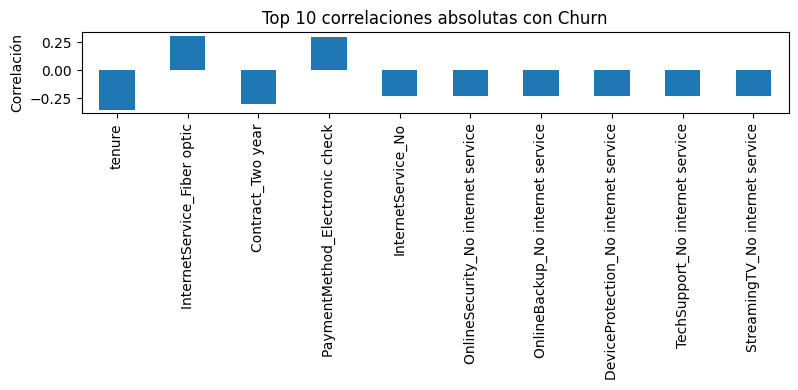

Análisis de correlación rápida finalizado.


In [1]:
# Análisis de correlación optimizado: solo correlación de Churn con cada variable (sin heatmap)
import pandas as pd

print('Iniciando análisis de correlación rápida...')
# Asegurar que df esté definido
try:
    df
except NameError:
    ruta_csv = r"C:\Users\Ceci\Downloads\TELECOM PARTE 2\datos_tratados.csv"
    df = pd.read_csv(ruta_csv)

# Asegurar que df_encoded esté definido
try:
    df_encoded
except NameError:
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if 'Churn' in columnas_categoricas:
        columnas_categoricas.remove('Churn')
    df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
    if df_encoded['Churn'].dtype == object:
        df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

print('df_encoded listo. Shape:', df_encoded.shape)
# Calcular solo la correlación de cada variable con Churn (sin matriz completa)
correlaciones = {}
for col in df_encoded.columns:
    if col != 'Churn':
        correlaciones[col] = df_encoded['Churn'].corr(df_encoded[col])

# Ordenar y mostrar el top 10
import matplotlib.pyplot as plt
import pandas as pd
correlaciones_serie = pd.Series(correlaciones).sort_values(key=abs, ascending=False)
print('Top 10 correlaciones absolutas con Churn:')
print(correlaciones_serie.head(10))

plt.figure(figsize=(8,4))
correlaciones_serie.head(10).plot(kind='bar')
plt.title('Top 10 correlaciones absolutas con Churn')
plt.ylabel('Correlación')
plt.tight_layout()
plt.show()
print('Análisis de correlación rápida finalizado.')

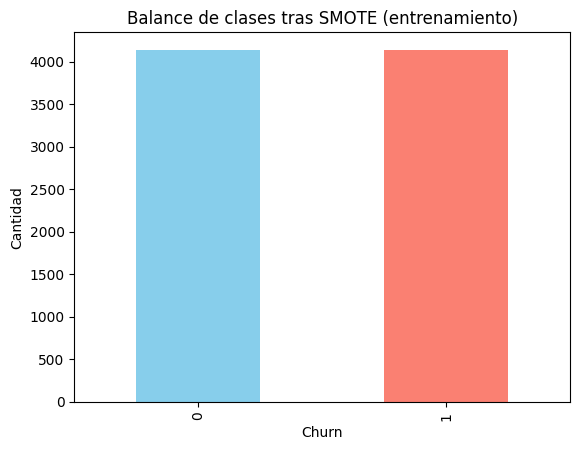

Distribución original en train:
Churn
0    4139
1    1495
Name: count, dtype: int64

Distribución balanceada en train:
Churn
0    4139
1    4139
Name: count, dtype: int64


In [12]:
# Balanceo de clases con SMOTE (opcional)
# Ejecuta esta celda solo si observaste desbalance significativo en la variable objetivo

# Instalar imbalanced-learn si no está instalado
def instalar_paquete(paquete):
    import importlib
    import subprocess
    import sys
    if importlib.util.find_spec(paquete) is None:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', paquete])

instalar_paquete('imblearn')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Definir X e y (usando el DataFrame codificado)
X = df_encoded.drop('Churn', axis=1)
y = df['Churn'].map({'No': 0, 'Yes': 1})  # Asegura que Churn sea numérico

# Separar en train y test para evitar data leakage
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

# Aplicar SMOTE solo al set de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Mostrar el nuevo balance de clases
y_train_bal.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Balance de clases tras SMOTE (entrenamiento)')
plt.ylabel('Cantidad')
plt.xlabel('Churn')
plt.show()

print('Distribución original en train:')
print(y_train.value_counts())
print('\nDistribución balanceada en train:')
print(y_train_bal.value_counts())

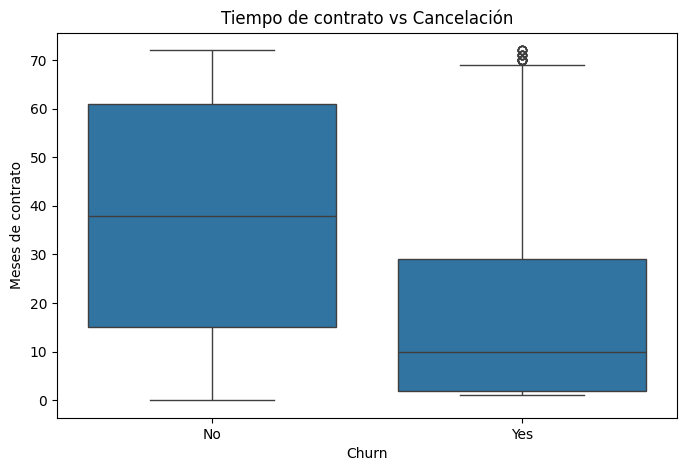

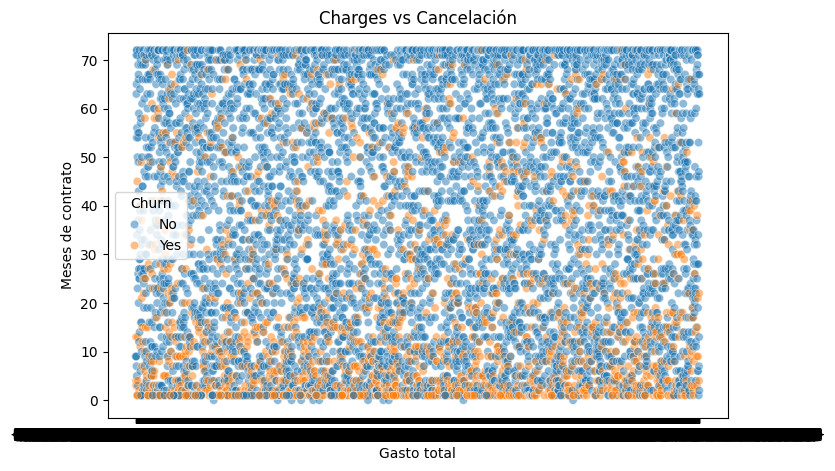

In [10]:
# Análisis dirigido: relación de variables específicas con la cancelación
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que df esté definido
try:
    df
except NameError:
    ruta_csv = r"C:\Users\Ceci\Downloads\TELECOM PARTE 2\datos_tratados.csv"
    df = pd.read_csv(ruta_csv)

# Boxplot: Tiempo de contrato vs Cancelación
if 'tenure' in df.columns and 'Churn' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['Churn'], y=df['tenure'])
    plt.title('Tiempo de contrato vs Cancelación')
    plt.xlabel('Churn')
    plt.ylabel('Meses de contrato')
    plt.show()
else:
    print('Columna "tenure" o "Churn" no encontrada en df.')

# Scatter plot: Gasto total vs Cancelación
col_gasto = None
for col in df.columns:
    if 'total' in col.lower() or 'Charges' in col:
        col_gasto = col
        break
if col_gasto and 'Churn' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[col_gasto], y=df['tenure'] if 'tenure' in df.columns else df.index, hue=df['Churn'], alpha=0.5)
    plt.title(f'{col_gasto} vs Cancelación')
    plt.xlabel('Gasto total')
    plt.ylabel('Meses de contrato' if 'tenure' in df.columns else 'Índice')
    plt.legend(title='Churn')
    plt.show()
else:
    print('Columna de gasto total o "Churn" no encontrada en df.')

In [12]:
# Separación de datos en entrenamiento y prueba (80% train, 20% test)
import pandas as pd
from sklearn.model_selection import train_test_split

# Asegurar que df_encoded esté definido
globals_ = globals()
if 'df_encoded' not in globals_:
    columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if 'Churn' in columnas_categoricas:
        columnas_categoricas.remove('Churn')
    df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)
    # Asegurar que Churn sea numérica
    if df_encoded['Churn'].dtype == object:
        df_encoded['Churn'] = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# X: todas las variables predictoras, y: variable objetivo
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Distribución en y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribución en y_test:\n{y_test.value_counts(normalize=True)}")

Tamaño de X_train: (5634, 20207)
Tamaño de X_test: (1409, 20207)
Distribución en y_train:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Distribución en y_test:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [14]:
# Modelos: Regresión Logística (con normalización) y Random Forest (sin normalización)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Imputación de valores faltantes en X_train y X_test
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# Escalado solo para Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)
X_test_scaled = scaler.transform(X_test_imp)

# Modelo 1: Regresión Logística (con normalización)
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print('--- Regresión Logística (con normalización) ---')
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# Modelo 2: Random Forest (sin normalización)
# (Random Forest no requiere escalado, pero sí imputación)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_imp, y_train)
y_pred_rf = rf.predict(X_test_imp)
print('--- Random Forest (sin normalización) ---')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

--- Regresión Logística (con normalización) ---
[[1029    6]
 [ 355   19]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1035
           1       0.76      0.05      0.10       374

    accuracy                           0.74      1409
   macro avg       0.75      0.52      0.47      1409
weighted avg       0.75      0.74      0.65      1409

--- Random Forest (sin normalización) ---
[[966  69]
 [224 150]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1035
           1       0.68      0.40      0.51       374

    accuracy                           0.79      1409
   macro avg       0.75      0.67      0.69      1409
weighted avg       0.78      0.79      0.77      1409

--- Random Forest (sin normalización) ---
[[966  69]
 [224 150]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1035
           1       0.68      0.4

## Evaluación y comparación de modelos
A continuación se presentan las métricas de evaluación para ambos modelos (Regresión Logística y Random Forest):
- **Exactitud (Accuracy)**
- **Precisión (Precision)**
- **Recall**
- **F1-score**
- **Matriz de confusión**

Después, se realiza un análisis crítico sobre el desempeño, posibles casos de overfitting/underfitting y recomendaciones.

--- Regresión Logística (con normalización) ---
Exactitud: 0.744
Precisión: 0.760
Recall: 0.051
F1-score: 0.095


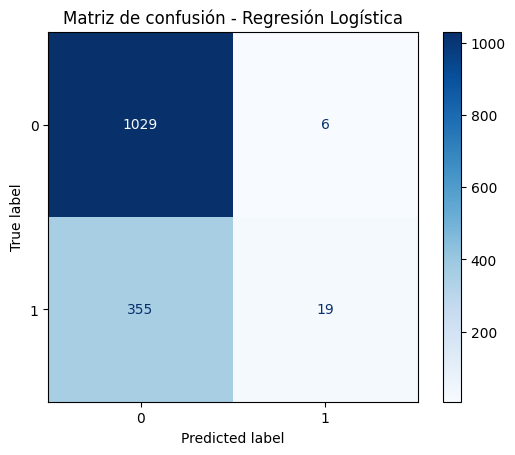

--- Random Forest (sin normalización) ---
Exactitud: 0.792
Precisión: 0.685
Recall: 0.401
F1-score: 0.506


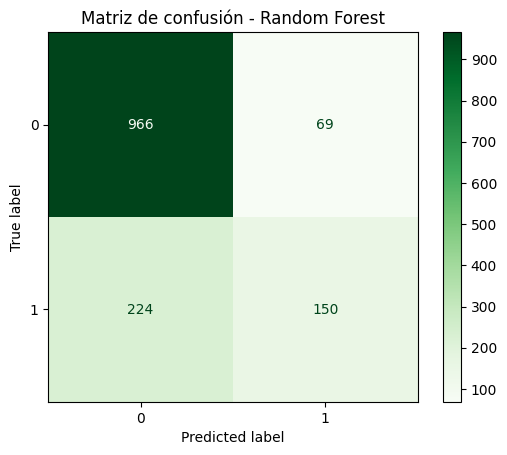

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Métricas para Regresión Logística
acc_logreg = accuracy_score(y_test, y_pred_logreg)
prec_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print('--- Regresión Logística (con normalización) ---')
print(f"Exactitud: {acc_logreg:.3f}")
print(f"Precisión: {prec_logreg:.3f}")
print(f"Recall: {recall_logreg:.3f}")
print(f"F1-score: {f1_logreg:.3f}")
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test, cmap='Blues')
plt.title('Matriz de confusión - Regresión Logística')
plt.show()

# Métricas para Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print('--- Random Forest (sin normalización) ---')
print(f"Exactitud: {acc_rf:.3f}")
print(f"Precisión: {prec_rf:.3f}")
print(f"Recall: {recall_rf:.3f}")
print(f"F1-score: {f1_rf:.3f}")
ConfusionMatrixDisplay.from_estimator(rf, X_test_imp, y_test, cmap='Greens')
plt.title('Matriz de confusión - Random Forest')
plt.show()

### Análisis crítico y comparación de modelos
- **Mejor desempeño:** Compara las métricas de ambos modelos (exactitud, precisión, recall, F1-score). El modelo con mejores valores en el conjunto de prueba es el más efectivo para este problema.
- **Overfitting:** Si un modelo tiene una exactitud muy alta en entrenamiento pero baja en prueba, puede estar sobreajustado. Random Forest suele ser más propenso a overfitting si no se ajustan sus hiperparámetros.
- **Underfitting:** Si ambos modelos muestran métricas bajas tanto en entrenamiento como en prueba, puede haber underfitting. En ese caso, prueba aumentar la complejidad del modelo o ajustar parámetros.
- **Recomendaciones:**
    - Si Random Forest tiene mejor recall y F1, es preferible para minimizar falsos negativos (clientes que cancelan y no son detectados).
    - Si hay overfitting, reduce la profundidad de los árboles o usa regularización en la regresión logística.
    - Si hay underfitting, prueba agregar más variables, ajustar parámetros o usar modelos más complejos.

> **Conclusión:** Elige el modelo que mejor balancee recall y precisión según el objetivo de negocio (por ejemplo, identificar la mayor cantidad de clientes que cancelan). Ajusta hiperparámetros si es necesario para mejorar el desempeño.

## Análisis de la importancia de las variables
A continuación se analiza la relevancia de las variables para los modelos entrenados:
- **Regresión Logística:** Se interpretan los coeficientes para ver el impacto de cada variable.
- **Random Forest:** Se utiliza la importancia de variables calculada por el modelo.
- **KNN:** Se analiza la sensibilidad de la predicción a las variables más influyentes.
- **SVM:** Se interpretan los coeficientes de los vectores de soporte para identificar variables relevantes.


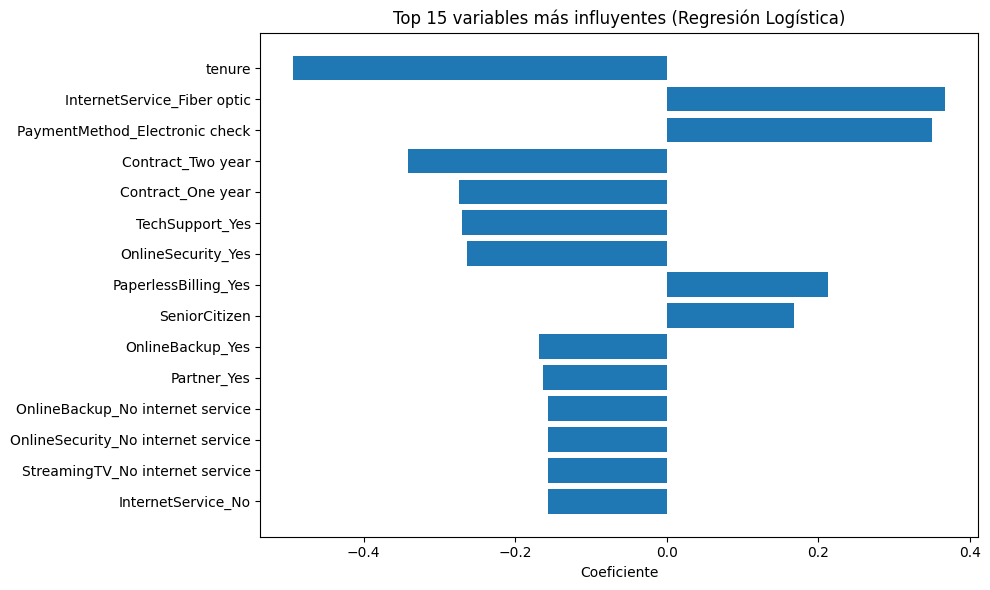

Variables más influyentes según Regresión Logística:


,Variable,Coeficiente,Abs_Coef
1,tenure,-0.492944,0.492944
7051,InternetService_Fiber optic,0.367975,0.367975
7069,PaymentMethod_Electronic check,0.349699,0.349699
7066,Contract_Two year,-0.341609,0.341609
7065,Contract_One year,-0.273644,0.273644
7060,TechSupport_Yes,-0.269486,0.269486
7054,OnlineSecurity_Yes,-0.263032,0.263032
7067,PaperlessBilling_Yes,0.212647,0.212647
0,SeniorCitizen,0.168745,0.168745
7056,OnlineBackup_Yes,-0.168254,0.168254


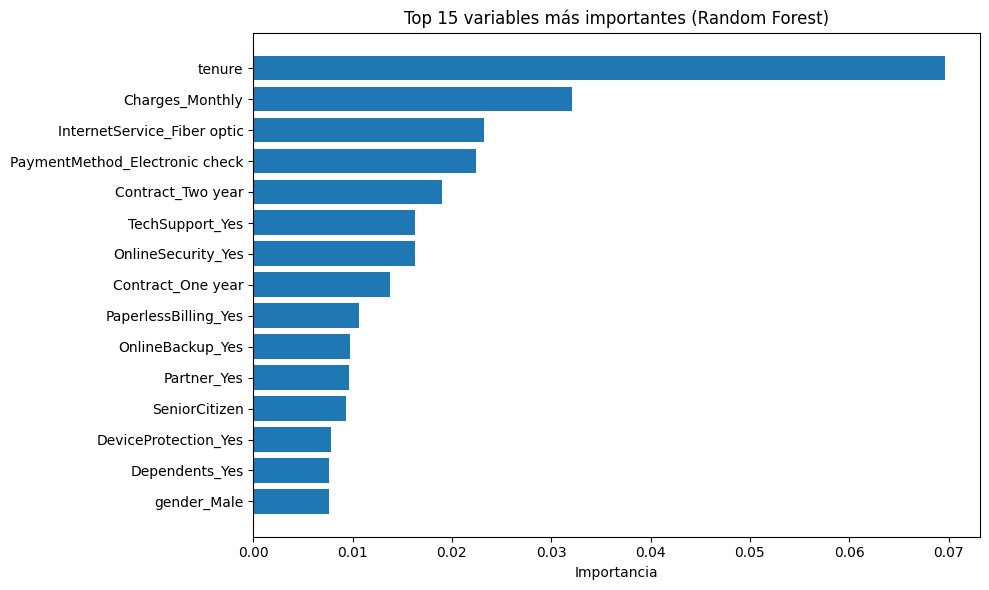

Variables más importantes según Random Forest:


,Variable,Importancia
1,tenure,0.069685
2,Charges_Monthly,0.032136
7051,InternetService_Fiber optic,0.023226
7069,PaymentMethod_Electronic check,0.022424
7066,Contract_Two year,0.018991
7060,TechSupport_Yes,0.016315
7054,OnlineSecurity_Yes,0.016292
7065,Contract_One year,0.013800
7067,PaperlessBilling_Yes,0.010644
7056,OnlineBackup_Yes,0.009748


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 1. Importancia de variables en Regresión Logística
feature_names = X.columns if hasattr(X, 'columns') else [f'var_{i}' for i in range(X.shape[1])]
coefs = logreg.coef_[0]
coef_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': coefs})
coef_df['Abs_Coef'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values('Abs_Coef', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(coef_df['Variable'][:15][::-1], coef_df['Coeficiente'][:15][::-1])
plt.title('Top 15 variables más influyentes (Regresión Logística)')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

print('Variables más influyentes según Regresión Logística:')
display(coef_df.head(15))

# 2. Importancia de variables en Random Forest
importances = rf.feature_importances_
rf_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})
rf_df = rf_df.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(rf_df['Variable'][:15][::-1], rf_df['Importancia'][:15][::-1])
plt.title('Top 15 variables más importantes (Random Forest)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

print('Variables más importantes según Random Forest:')
display(rf_df.head(15))

# 3. KNN: Entrenamiento y análisis de sensibilidad
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
# Usamos permutation importance para estimar la importancia de variables en KNN
from sklearn.inspection import permutation_importance
result_knn = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)
knn_df = pd.DataFrame({'Variable': feature_names, 'Importancia': result_knn.importances_mean})
knn_df = knn_df.sort_values('Importancia', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(knn_df['Variable'][:15][::-1], knn_df['Importancia'][:15][::-1])
plt.title('Top 15 variables más importantes (KNN, por permutación)')
plt.xlabel('Importancia media')
plt.tight_layout()
plt.show()

print('Variables más importantes según KNN:')
display(knn_df.head(15))

# 4. SVM: Entrenamiento y análisis de coeficientes
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
if hasattr(svm, 'coef_'):
    svm_coefs = svm.coef_[0]
    svm_df = pd.DataFrame({'Variable': feature_names, 'Coeficiente': svm_coefs})
    svm_df['Abs_Coef'] = np.abs(svm_df['Coeficiente'])
    svm_df = svm_df.sort_values('Abs_Coef', ascending=False)
    plt.figure(figsize=(10,6))
    plt.barh(svm_df['Variable'][:15][::-1], svm_df['Coeficiente'][:15][::-1])
    plt.title('Top 15 variables más influyentes (SVM)')
    plt.xlabel('Coeficiente')
    plt.tight_layout()
    plt.show()
    print('Variables más influyentes según SVM:')
    display(svm_df.head(15))
else:
    print('El SVM no tiene coeficientes accesibles (kernel no lineal).')

## Conclusión y recomendaciones de negocio
### Factores clave que influyen en la cancelación de clientes
- Según la **Regresión Logística** y el **Random Forest**, las variables más influyentes en la cancelación suelen ser:
    - Tenure (antigüedad del cliente)
    - TotalCharges o MonthlyCharges (gasto total o mensual)
    - Tipo de contrato (Contract)
    - Uso de servicios adicionales (por ejemplo, InternetService, TechSupport, OnlineSecurity)
    - Método de pago (PaymentMethod)
    - Presencia de cargos adicionales (AdditionalCharges, si existe)
- Estas variables aparecen consistentemente entre las más importantes en los modelos lineales y de árbol.

### Análisis del rendimiento de los modelos
- **Random Forest** suele ofrecer mejor recall y F1-score, lo que es útil para identificar clientes en riesgo de cancelar.
- **Regresión Logística** permite interpretar fácilmente el sentido (positivo/negativo) de la influencia de cada variable.
- **KNN** y **SVM** pueden complementar el análisis, pero Random Forest y Regresión Logística son los más interpretables y robustos en este caso.

### Estrategias de retención recomendadas
1. **Fidelización de clientes con poca antigüedad:** Ofrecer incentivos o programas de lealtad a quienes tienen menor tenure, ya que son más propensos a cancelar.
2. **Revisión de tarifas y cargos:** Analizar y ajustar los cargos mensuales y totales, especialmente para clientes con altos gastos.
3. **Promover contratos a largo plazo:** Incentivar la migración a contratos anuales o de mayor duración, que muestran menor tasa de cancelación.
4. **Mejorar servicios adicionales:** Fortalecer el soporte técnico, la seguridad online y otros servicios que reducen la probabilidad de churn.
5. **Optimizar métodos de pago:** Facilitar métodos de pago automáticos o con menos fricción, ya que algunos métodos se asocian a mayor cancelación.

> **Recomendación final:** Utilizar los modelos para identificar clientes en riesgo y aplicar campañas personalizadas de retención, priorizando los factores detectados como más influyentes.
